# Homework 2 - Linear Regression
For HW2, you will apply linear regression to real energy datasets. This assignment is designed to provide hands-on practice on a common method of supervised learning.

***MAKE YOUR OWN COPY OF THIS FILE BEFORE YOU START.***

## Sections:
- **Linear Regression Example**: View an example of how to initialize and run a linear regression model using built in functions.
- **Train-Test Split**: Taking a dataset, randomly assign a subset of points to the training data set and the rest to the testing dataset. Create a new linear regression model trained on just the training data.
- **Error Metric**: Compute the MSE between the predicted values and the acutal values.
- **K-Fold Cross-Validation**: Implement a popular method of evaluating predictive models' performance.
- **Real-World Applications**:
  - Energy
  - Ocean (*MS Student Only*): Perform **hyperparameter tuning** on regression models.

## To-Do List
Look out for sections marked "# IMPLEMENT" and "# QUESTION"
- **Undergrads**: 5 Implement Blocks + 1 Question Block = 6 Points Total
- **Masters**: 7 Implement Blocks + 2 Question Blocks = 9 Points Total


Complete each task and submit your Jupyter Notebook on Blackboard. Partial credit can be earned.

In [1]:
# Import Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

## [1] Linear Regression Example

In [2]:
# Generate 1000 Random Points as an Example and for Testing
num_points = 1000
num_features = 5

# Set Random Seed for Reproducibility
np.random.seed(hash("csci")%461)

# Create Random Data from Random Function (w*X)
true_weights = np.random.randn(5)+([3]+[0]*(num_features-1))

# Randomly Generate Data According to Normal Distribution
X_full = np.random.randn(num_points, num_features)

# Create Random y from Features as Linear Weighted Sum (with some additional noise).
y_full = X_full.dot(true_weights) + np.random.randn(num_points)

In [3]:
# Print out True Weights
true_weights

array([ 2.94894452, -0.66336943,  0.14590169, -1.46975244, -0.13314116])

With the above weights that we have defined, we can see that the first dimension has the largest weight/impact on the output, `y`. Let's visualize the first dimension against y. Examine the correlation between the different features and the target variable.

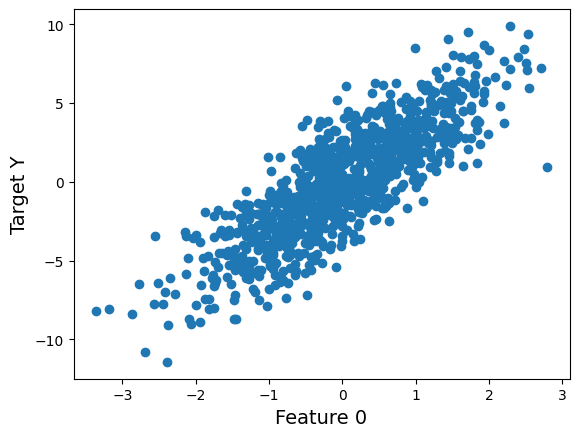

In [4]:
# Visualize the First Dimension with Target y
plt.scatter(X_full[:,0], y_full)
plt.xlabel("Feature 0",size=14)
plt.ylabel("Target Y",size=14)
plt.show()

When comparing the first dimesnion with the target variable `y`, we see that it has a linear relationship. Assuming that all assumptions of linear regression have been met (linear relationship between variables, independence between data points, homoscedasticity(points having equal variance), and normality), let's fit a linear regression model on a portion of a data. Using that model, predict the output on the full dataset to evalute the results.

[ 2.76809598  1.47880932 -2.31055753 -4.76231133 -8.01502489 -0.56864552
 -0.16985606  6.08773934 -4.71786882  1.50635712  3.02106599 -5.85371846
  3.03573573  0.68687364  3.71910357 -0.75326942 -3.50514374  1.78063323
  7.09786186  4.49891372]


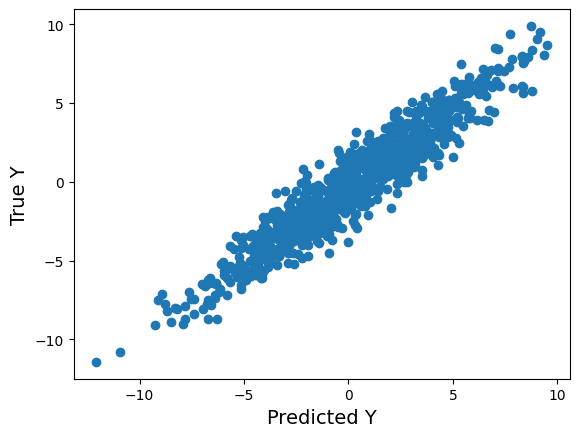

In [5]:
## Fit a Linear Regression Model using sklearn
# Initialize Model
example_model = linear_model.LinearRegression()

# Fit Model on Portion of Data (First 20 Items)
example_model.fit(X_full[:20], y_full[:20])

# Make Predictions on Full Dataset
y_pred = example_model.predict(X_full)
print(y_full[:20])

# Visualize Actual vs. Predicted Values
plt.scatter(y_pred, y_full)
plt.xlabel("Predicted Y",size=14)
plt.ylabel("True Y",size=14)
plt.show()

We can see that the example model did a good job of predicting `y` values when trained on just a subset of the data.

## [2] Train-Test Split

Training data versus test data are important aspects in modeling. Training data represents the subset of data that teaches the algorithm, which in our case in linear regression. Testing data is the subset of data that helps validate the performance of the model's training. Splitting the data into these two parts is important to make sure your model doesn't overfit on one specific dataset.

Below, you will implement a function that randomly assigns data points to either a training or testing set.

In [6]:
def random_split(p: float, X: np.array, y: np.array):

    """

    Given a numpy feature matrix X of size NxM where N is the number of points and M is
    the number of features and a target variable y of size Nx1 where N is the number
    of points. Randomly split X and y by P where P is the "proportion" of
    points in the training set, 1-P is proportion of points in the test set.

    Try to use np.random.shuffle with the indices.

    Output should be a list of numpys [X_train, X_test, y_train, y_test]

    In this order,
    X_train of size N*P x M
    X_test of size N*(1-P) x M
    y_train of size N*P x 1
    y_test of size N*(1-P) x 1

    """

    # -------------------------------------------------------------------------
    # IMPLEMENT - 1 Point
    # -------------------------------------------------------------------------

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    splitPoint = int(X.shape[0]*p)

    trainIndex = indices[:splitPoint]
    testIndex = indices[splitPoint:]

    trainX = X[trainIndex]
    trainY = y[trainIndex]

    testX = X[testIndex]
    testY = y[testIndex]
    # x_train, x_test,y_train,y_test = train_test_split(X,y,test_size = p)

    return [trainX,testX,trainY,testY]

In [7]:
# Example Data Shape
print("X shape:", X_full.shape)
print("y shape:", y_full.shape)

# View Example Test/Train Split on Example Data
train_p = 0.8
X_tr, X_te, y_tr, y_te = random_split(train_p, X_full, y_full)
print("shapes of test/train split:", X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

X shape: (1000, 5)
y shape: (1000,)
shapes of test/train split: (800, 5) (200, 5) (800,) (200,)


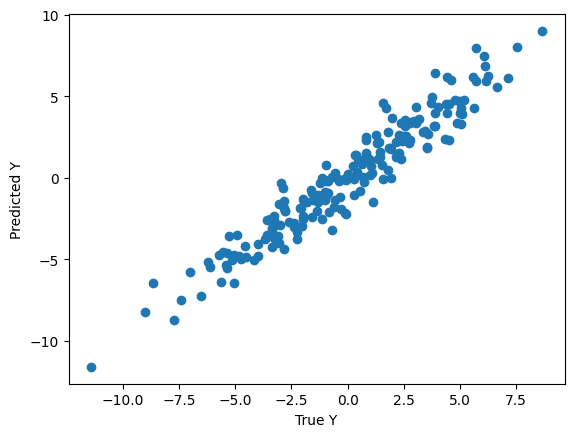

In [8]:
# Fit New Linear Regression Model with Training Data
model = linear_model.LinearRegression()

# Fit the Model on the Training Data
model.fit(X_tr, y_tr)

# Apply the Model on Test Data
y_pred = model.predict(X_te)

# Visualize y_pred with Actual Values, y_te, to Evaluate Model Performance
plt.scatter(y_te, y_pred)
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.show()

## [3] Error Metric

There are many ways to evaluate the performance of a model. MSE measures the amount of error in model by using the average squared difference between observed versus predicted values.

Below, you will implement a function that calculates the mean squared error (MSE).

In [9]:
def mean_squared_error(y_true: np.array, y_pred: np.array):

    """

    Computes mean squared error between input vectors y_true and y_pred. Both inputs
    are numpy array of size Nx1 where N is the number of points.

    Output should be a numpy float

    You should not be using sklearn's implementation here

    """

    # -------------------------------------------------------------------------
    # IMPLEMENT - 1 Point
    # -------------------------------------------------------------------------

    squared_errors = (y_true - y_pred) ** 2
    # Calculate the mean squared error
    mse = np.mean(squared_errors)
    return mse

In [10]:
from sklearn import metrics

# Look at three different metrics: The output of your Mean Square Error function, Mean Absolute Error, and R2
mse = mean_squared_error(y_te, y_pred)
mae = metrics.mean_absolute_error(y_te, y_pred)
rsq = metrics.r2_score(y_te, y_pred)
print(mse)
print(mae)
print(rsq)

1.025831202142233
0.7903605944991061
0.9196340608315346


## [4] K-Fold Cross-Validation

K-fold Cross Validation is another method used to prevent overfitting and optimize a predictive model that works similarly to train/test split. In this method, the data is split into `k` subsets. You will then train the model on each k subset, testing it on a different subset of data each iteration.

Lastly, you will average the error metrics across each iteration to evaluate the model's performance.

In [11]:
def cross_validate(model, X: np.array, y: np.array, k: int, metrics=[mean_squared_error]):

    """

    Given a model with feature matrix X of size NxM and target variable y
    of size Nx1 where N is the number of points and M is the number of features.

    Partition X and y into K partitions. Use K-fold cross-validation to train and
    evaluate the model with given a list of error metrics (either your own functions or existing ones).

    metrics specifies a list of error metrics function names (one or more of them), of length E.
    The defauls value for 'metrics' is to use the function mean_square_error

    Remember:
    train the model with the training set and evaluate the model on the test set.

    Output should be a list of size ExK where E is the number of error metrics
    and K is the number of partitions.

    Output Example:
    cross_validate = [[mse_cross_val_1, mse_cross_val_2, ..., mse_cross_val_k],
                     [other_metric_1,...],[other_metric_2,...]]

    """

    # -------------------------------------------------------------------------
    # IMPLEMENT - 1 Point
    # -------------------------------------------------------------------------

    # cross_val_metrics = [[] for _ in range(len(metrics))]

    N = X.shape[0]
    partition_size = N // k
    cross_val_metrics = []

    for metric_func in metrics:
        metric_results = []
        for i in range(k):
            # Split the data into training and testing sets
            test_indices = np.arange(i * partition_size, (i + 1) * partition_size)
            train_indices = np.delete(np.arange(N), test_indices)
            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            # Train the model
            model.fit(X_train, y_train)

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Visualize y_pred with Actual Values, y_te, to Evaluate Model Performance
            plt.scatter(y_test, y_pred)
            plt.xlabel("True Y")
            plt.ylabel("Predicted Y")
            plt.show()

            # Calculate the error metric for this fold
            error = metric_func(y_test, y_pred)
            metric_results.append(error)

        cross_val_metrics.append(metric_results)



    return cross_val_metrics

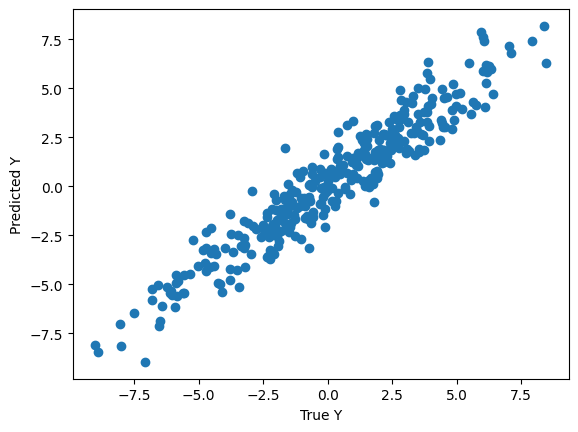

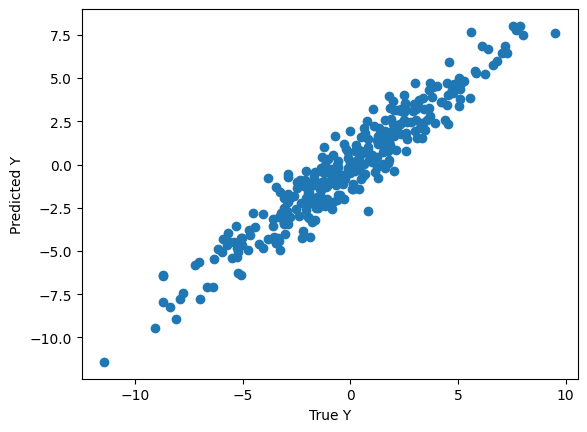

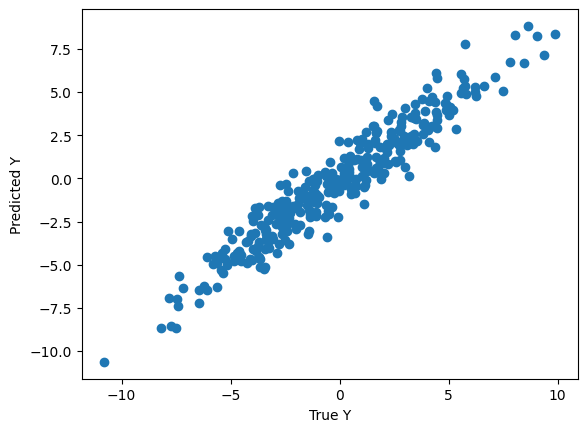

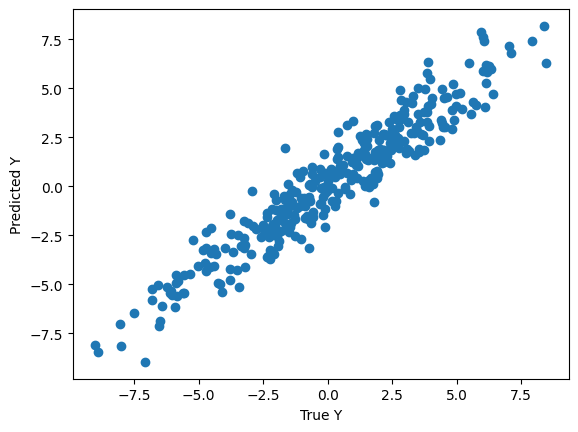

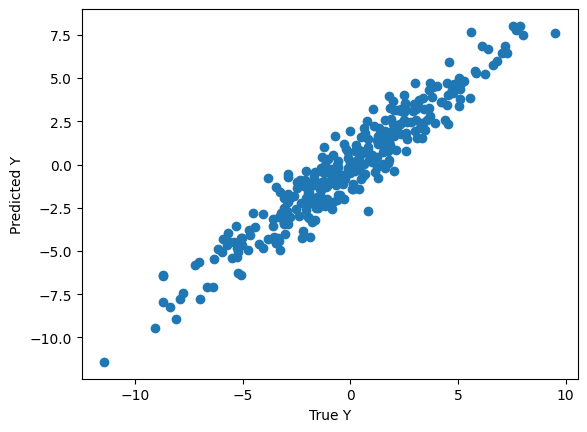

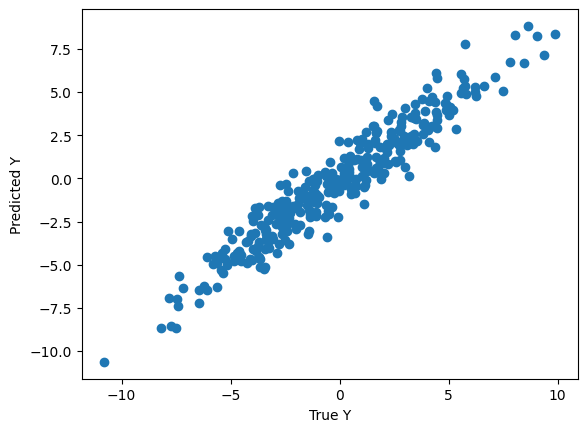

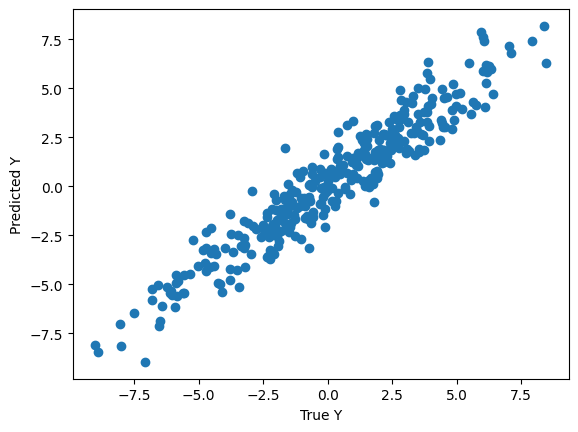

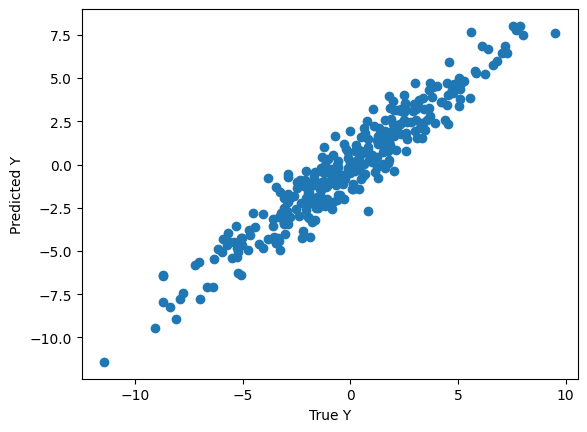

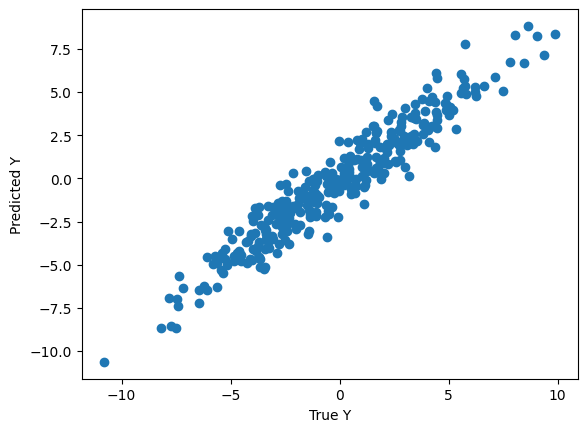

,Model,Error,Mean,Std
0,Linear,MAE,0.839628,0.016251
1,Linear,MSE,1.084530,0.030272
2,Linear,R2,0.910212,0.003782


In [12]:
# Initialize New Model
model = linear_model.LinearRegression()

# Try K-fold Cross Validation with Three Different Error Metrics
k = 3
cross_val_metrics = cross_validate(model, X_full, y_full, k, metrics=[mean_squared_error, metrics.mean_absolute_error, metrics.r2_score])

df_lr = pd.DataFrame({"Model":["Linear","Linear","Linear"],
                      "Error":["MSE", "MAE", "R2"],
                      "Mean":np.mean(cross_val_metrics, axis=1),
                      "Std":np.std(cross_val_metrics, axis=1)})
df_lr = df_lr.sort_values("Error").reset_index(drop=True)
df_lr

# note if you haven't yet implemented mean_squared_error, you can add any of the
# sklearn metrics from https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

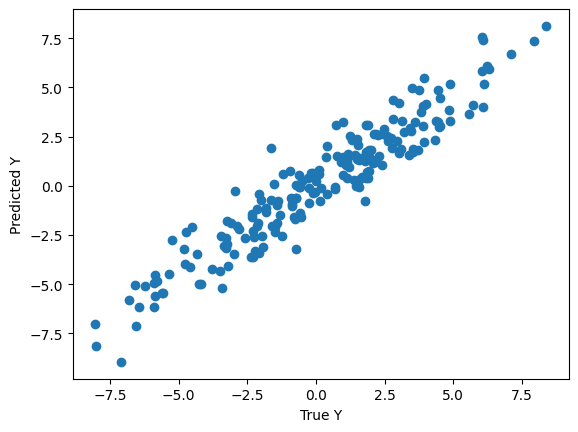

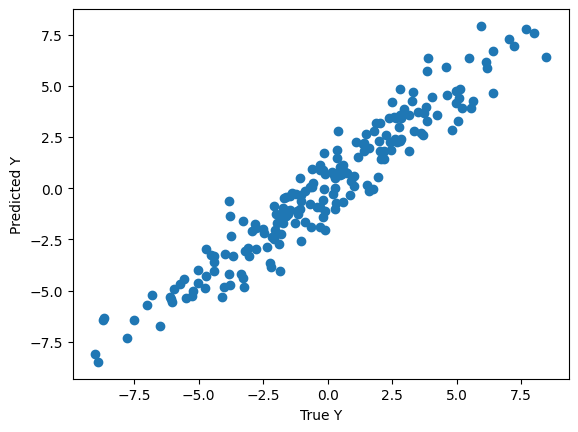

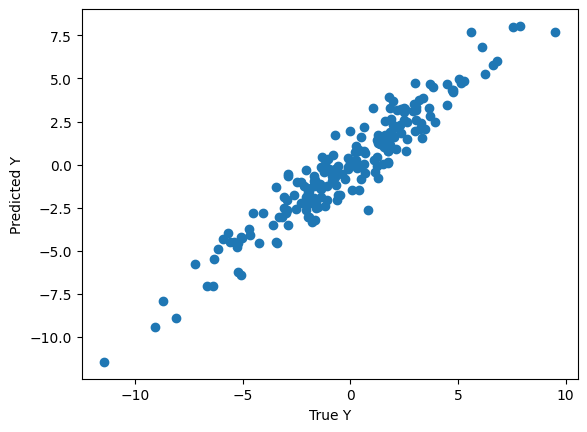

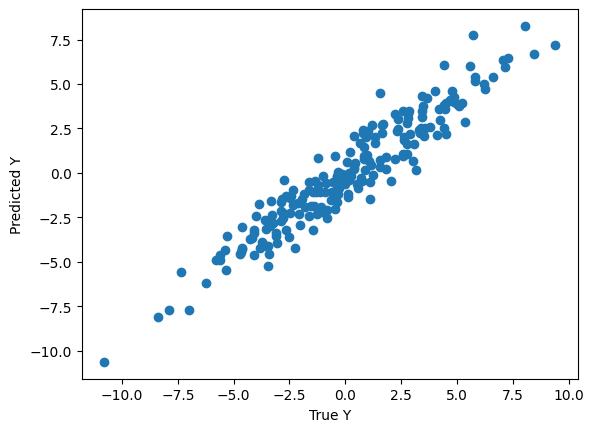

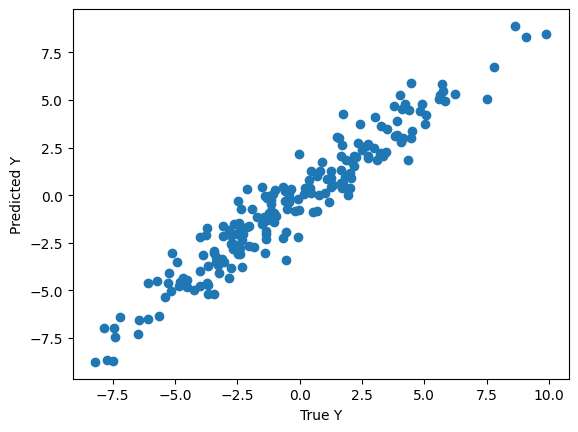

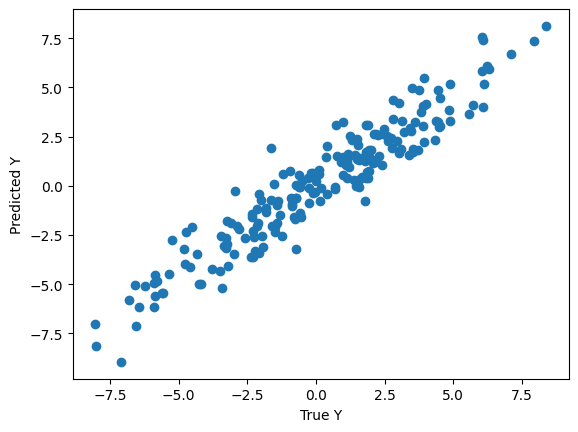

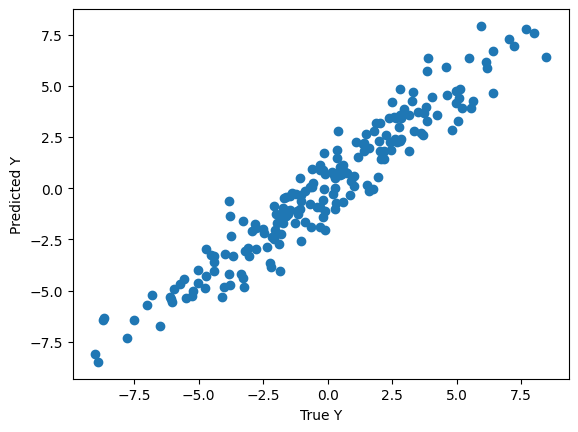

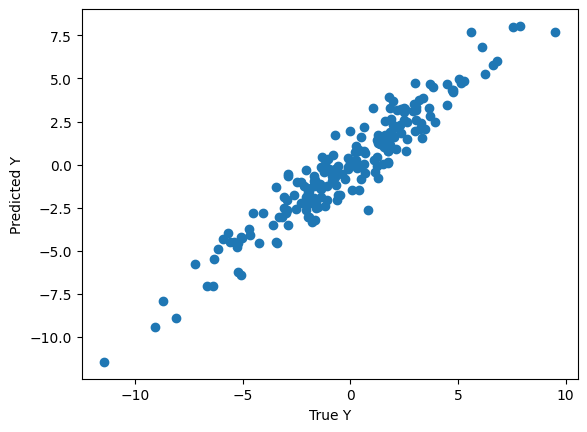

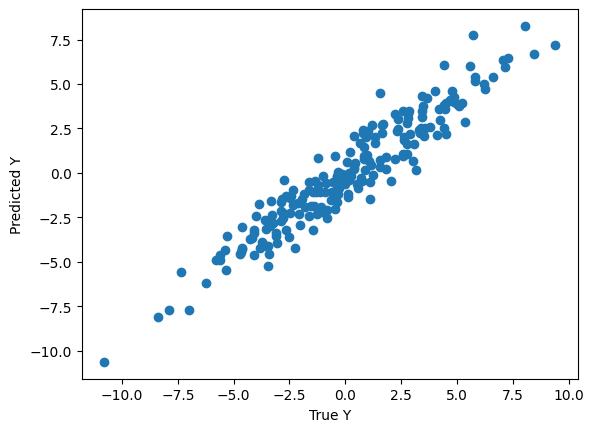

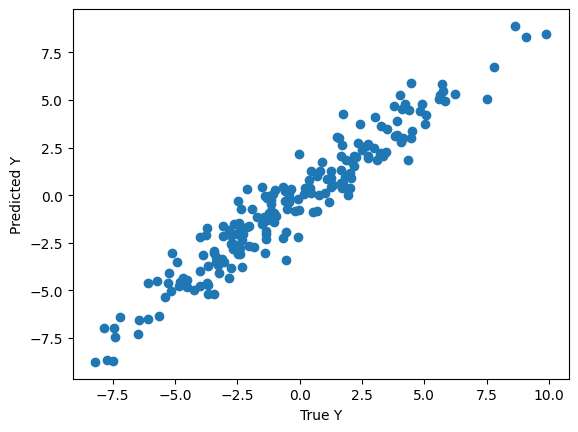

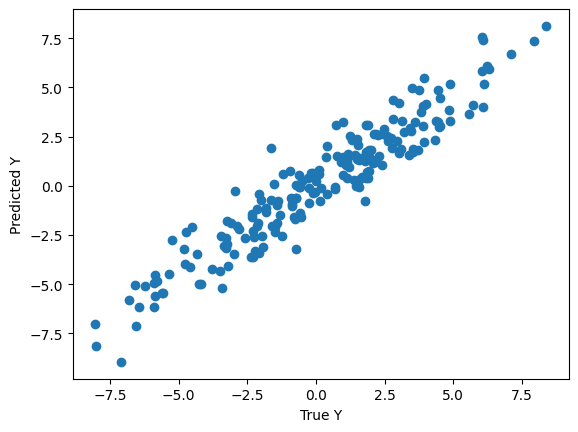

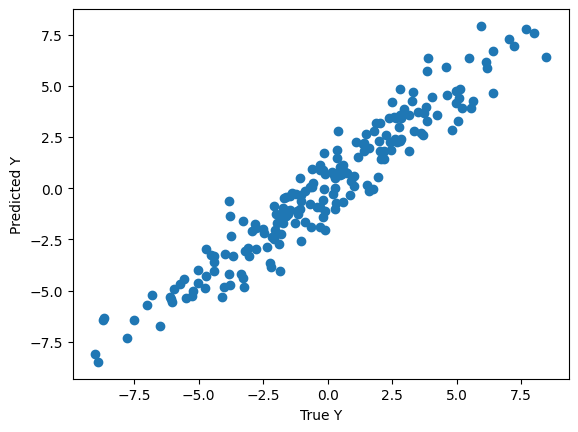

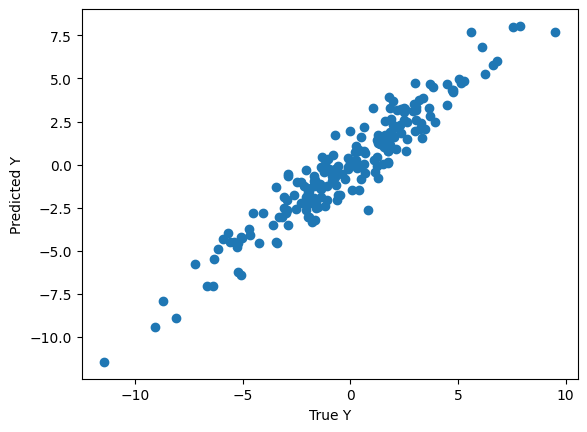

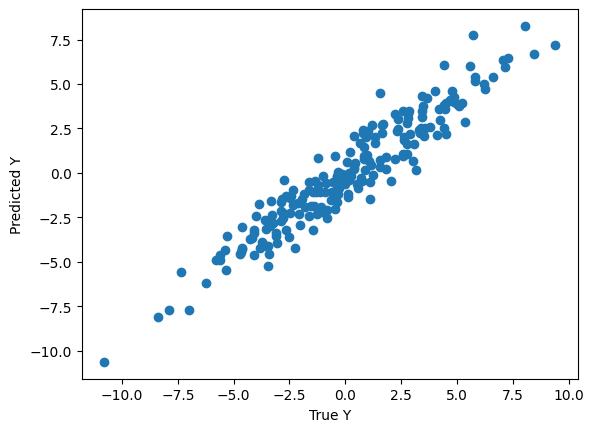

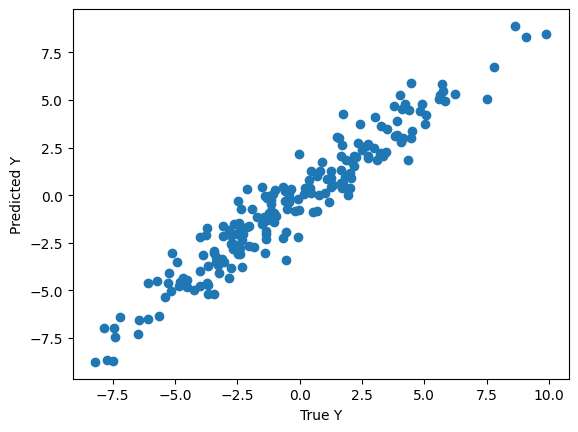

,Model,Error,Mean,Std
0,Ridge,MSE,1.085907,0.083764
1,Ridge,MAE,0.840610,0.040839
2,Ridge,R2,0.909749,0.008891


In [13]:
'''

Initailize a Ridge Regression model and run 5-fold cross-validation on the data
  - Show average error over the K folds for mean squared error, mean absolute error, r2 score ( a list of 3 values)
  - Show standard deviation over the K folds for the same 3 metrics (a list of 3 values)
  - Put these statistics in a pandas dataframe

'''

# -------------------------------------------------------------------------
# IMPLEMENT - 1 Point
# -------------------------------------------------------------------------

# Initialize New Model
model = Ridge()

# Try K-fold Cross Validation with Three Different Error Metrics
k = 5
cross_val_metrics = cross_validate(model, X_full, y_full, k, metrics=[mean_squared_error, metrics.mean_absolute_error, metrics.r2_score])

# Example Output
pd.DataFrame({"Model":["Ridge","Ridge","Ridge"],
                      "Error":["MSE", "MAE", "R2"],
                      "Mean":np.mean(cross_val_metrics, axis=1),
                      "Std":np.std(cross_val_metrics, axis=1)})

## [5] Real-World Application - Energy

The Commercial Buildings Energy Consumption Survey (CBECS) provide building characteristic information for the ~5.9 million U.S. commercial buildings in 2012. The building characteristic data tables include data on the number of workers, ownership and occupancy, structural characteristics, energy sources and uses, energy related building features, and more.

For more informatoin, visit
https://asu.pure.elsevier.com/en/publications/machine-learning-approaches-for-estimating-commercial-building-en


In [14]:
# Import Useful Libraries
import pandas as pd
import numpy as np
from scipy import stats
import os
from collections import Counter
from sklearn import model_selection, kernel_ridge, linear_model, metrics, feature_selection, preprocessing
from sklearn.linear_model import Ridge
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')

np.random.seed(6174)

In [15]:
# Download Data into data/cbecs in the Current Directory
# run !ls data/cbecs to see the csv it downloaded
!wget --directory-prefix=data/cbecs/ -Nq https://www.eia.gov/consumption/commercial/data/2012/xls/2012_public_use_data_aug2016.csv

In [16]:
# Declare Directory to Write/Read Data From
CBECS_DATA_FN = "data/cbecs/2012_public_use_data_aug2016.csv"

In [17]:
def mkdir(path):
    try:
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise
        else:
            print("(%s) already exists" % (path))

mkdir("output/")
mkdir("output/trainedModels/")

(output/) already exists
(output/trainedModels/) already exists


Now that we have loaded the data, it is time to parse and format our dataset.

This next bit of code creates a pandas dataframe of the data from the downloaded file. This pandas functionality automatically parses csv files. Try it out with datasets containing datetimes, as it can be pretty handy.

In [18]:
# Read Loaded CSV File
raw_df = pd.read_csv(CBECS_DATA_FN)

In [19]:
# Preview the Data
raw_df.describe()

,PUBID,REGION,CENDIV,PBA,FREESTN,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,...,FKCLBTU,FKWTBTU,FKCKBTU,FKOTBTU,DHHTBTU,DHCLBTU,DHWTBTU,DHCKBTU,DHOTBTU,PUBCLIM
count,6720.000000,6720.00000,6720.000000,6720.000000,6106.0,6.720000e+03,6720.000000,6720.000000,6720.000000,6720.000000,...,1.515000e+03,1515.000000,1.515000e+03,1.515000e+03,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,407.0,6720.000000
mean,3360.500000,2.68631,5.283036,12.638988,1.0,1.244735e+05,4.726042,2.390923,3.968006,1.794792,...,1.789564e+04,5680.083168,3.550484e+04,7.023690e+05,2.179586e+07,1.008283e+06,6.573793e+06,5.574303e+06,0.0,2.128869
std,1940.041237,1.00488,2.484231,11.997992,0.0,2.586132e+05,2.363545,1.630654,2.009211,0.403884,...,3.474166e+05,50436.136609,9.406523e+05,1.861955e+06,4.081759e+07,6.976516e+06,1.384098e+07,1.943613e+07,0.0,1.204274
min,1.000000,1.00000,1.000000,1.000000,1.0,1.001000e+03,2.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000
25%,1680.750000,2.00000,3.000000,5.000000,1.0,5.000000e+03,2.000000,1.000000,2.000000,2.000000,...,0.000000e+00,0.000000,0.000000e+00,6.805000e+03,3.189500e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000
50%,3360.500000,3.00000,5.000000,13.000000,1.0,2.075000e+04,4.000000,2.000000,4.000000,2.000000,...,0.000000e+00,0.000000,0.000000e+00,1.245530e+05,9.046000e+06,0.000000e+00,8.205240e+05,0.000000e+00,0.0,2.000000
75%,5040.250000,3.00000,7.000000,16.000000,1.0,1.140000e+05,7.000000,3.000000,6.000000,2.000000,...,0.000000e+00,0.000000,0.000000e+00,6.632065e+05,2.182357e+07,0.000000e+00,6.126484e+06,0.000000e+00,0.0,3.000000
max,6720.000000,4.00000,9.000000,91.000000,1.0,1.500000e+06,10.000000,9.000000,9.000000,2.000000,...,1.009424e+07,796586.000000,3.092393e+07,3.416677e+07,4.400042e+08,9.311439e+07,1.306407e+08,2.172590e+08,0.0,7.000000


This next piece of code selects the relevant columns. We will index the relevant feature and target columns from the data and store them into a list.

In [20]:
xIndices = []
yIndices = []

target_col = "MFBTU"
feature_cols = []

for col_ind, col_name in enumerate(raw_df.columns):
    if col_name == "MFBTU":
        yIndices.append(col_ind)
    elif "ZMFBTU" in col_name:
        xIndices.append(col_ind)
        feature_cols.append(col_name)
    elif col_name.startswith("Z"):       # Every feature that starts with a Z is an accessory variable that tells whether another variable was imputed, etc.
        pass
    elif col_name.startswith("FINALWT"): # There is a finalwt feature for every other variable. These are unecessary.
        pass
    elif col_ind >= 1051:                # Don't keep data after MFBTU.
        pass
    else:
        xIndices.append(col_ind)
        feature_cols.append(col_name)
raw_df = raw_df[[target_col] + feature_cols]
print(raw_df.shape)

(6720, 450)


In [21]:
col_to_check = "ZMFBTU"
useful_rows = (raw_df[col_to_check] != 2) & (raw_df[col_to_check] != 9)
raw_df = raw_df[useful_rows]

In [22]:
# The "floor" variable takes some very high values. Let's set these to 20 and 30 floors respectively.
   # Alternatively, we could consider a quantile scaler.
   # Note that we are changing the data here! You can check that the above cell returns a different value after running this cell.
raw_df[raw_df["NFLOOR"] == 994]["NFLOOR"] = 20
raw_df[raw_df["NFLOOR"] == 995]["NFLOOR"] = 30

To further clean our data, we will eliminate features with > 25% missing data. For all features remaining, we will then replace any missing value with the most frequently occuring value (the mode).

In [23]:
# Count # Nulls per Column
raw_df.isna().sum()

MFBTU       0
PUBID       0
REGION      0
CENDIV      0
PBA         0
         ... 
DAYLTP    153
HDD65       0
CDD65       0
MFUSED      0
ZMFBTU      0
Length: 450, dtype: int64

In [24]:
# Identify Features w/ >25% Values Missing
bad_col_inds = (raw_df.isna().sum() / raw_df.shape[0]) > 0.25
raw_df = raw_df[raw_df.columns[~bad_col_inds]]

In [25]:
# Fill Remaining Missing Rows w/ Mode
raw_df.fillna(raw_df.mode().iloc[0], inplace=True)

We will now define our X and Y columns in the dataset. Save these components as they will be used in our modeling.

In [26]:
# Take X and Y from the useful rows in the corresponding columns
X = raw_df[raw_df.columns[raw_df.columns != target_col]].values
Y = raw_df[target_col].values

# Print Summary Data of X and Y
print("features shape:", X.shape)
print("target shape:", Y.shape)

features shape: (5099, 179)
target shape: (5099,)


In [27]:
# Save Data
feature_columns = np.array(raw_df.columns[raw_df.columns != target_col])

np.save("output/cbecs_X_MFBTU.npy", X)
np.save("output/cbecs_Y_MFBTU.npy", Y)
np.save("output/cbecs_headers_MFBTU.npy", feature_columns)

numberOfSamples = X.shape[0]
numberOfFeatures = X.shape[1]

Now that we have cleaned and otherwise prepared out data, let us finalize our dataset with a reduced number of features.

In [28]:
'''

"PBA": Principal building activity
"SQFT": Square footage
"CDD65": Cooling degree days (base 65)
"HDD65": Heating degree days (base 65)
"NFLOOR": Number of floors

'''

# Features we are keeping
columnsToKeep = np.array(["PBA", "SQFT", "CDD65", "HDD65", "NFLOOR"])
newX = raw_df[columnsToKeep]
newY = raw_df[target_col]


np.save("output/cbecs_reduced_X_MFBTU.npy", newX)
np.save("output/cbecs_reduced_Y_MFBTU.npy", newY)
np.save("output/cbecs_reduced_headers_MFBTU.npy", columnsToKeep)

It is now time to create and fit a linear regression model to our dataset. The below cell of code defines numerous helper functions that prepare the data for linear regression.

In [29]:
# Helper Functions
pbaLabels = {
    1  : 'Vacant',
    2  : 'Administrative/professional office',
    3  : 'Bank/other financial',
    4  : 'Government office',
    5  : 'Medical office (non-diagnostic)',
    6  : 'Mixed-use office',
    7  : 'Other office',
    8  : 'Laboratory',
    9  : 'Distribution/shipping center',
    10 : 'Non-refrigerated warehouse',
    11 : 'Self-storage',
    12 : 'Convenience store',
    13 : 'Convenience store with gas station',
    14 : 'Grocery store/food market',
    15 : 'Other food sales',
    16 : 'Fire station/police station',
    17 : 'Other public order and safety',
    18 : 'Medical office (diagnostic)',
    19 : 'Clinic/other outpatient health',
    20 : 'Refrigerated warehouse',
    21 : 'Religious worship',
    22 : 'Entertainment/culture',
    23 : 'Library',
    24 : 'Recreation',
    25 : 'Social/meeting',
    26 : 'Other public assembly',
    27 : 'College/university',
    28 : 'Elementary/middle school',
    29 : 'High school',
    30 : 'Preschool/daycare',
    31 : 'Other classroom education',
    32 : 'Fast food',
    33 : 'Restaurant/cafeteria',
    34 : 'Other food service',
    35 : 'Hospital/inpatient health',
    36 : 'Nursing home/assisted living',
    37 : 'Dormitory/fraternity/sorority',
    38 : 'Hotel',
    39 : 'Motel or inn',
    40 : 'Other lodging',
    41 : 'Vehicle dealership/showroom',
    42 : 'Retail store',
    43 : 'Other retail',
    44 : 'Post office/postal center',
    45 : 'Repair shop',
    46 : 'Vehicle service/repair shop',
    47 : 'Vehicle storage/maintenance',
    48 : 'Other service',
    49 : 'Other',
    50 : 'Strip shopping mall',
    51 : 'Enclosed mall',
    52 : 'Courthouse/probation office',
    53 : 'Bar/pub/lounge',
    91 : 'Other'
}

def to_categorical(y, nb_classes=None):

    '''

    Convert class vector (integers from 0 to nb_classes) to binary class matrix, for use with categorical_crossentropy.

    # Arguments
        y: class vector to be converted into a matrix
        nb_classes: total number of classes

    # Returns
        A binary matrix representation of the input.

    '''
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1.
    return Y

def doOneHot(classVals,uniqueVals=None,returnNames=False):

    oneHotClasses = classVals.copy()

    if uniqueVals is None:
        uniqueVals = sorted(list(set(classVals)))

    uniqueValsMap = {val:i for i,val in enumerate(uniqueVals)}
    for i in range(oneHotClasses.shape[0]):
        oneHotClasses[i] = uniqueValsMap[oneHotClasses[i]]
    oneHotClasses = to_categorical(oneHotClasses)

    if returnNames:
        return oneHotClasses, uniqueVals
    else:
        return oneHotClasses

def getDataset(datasetType=0,pbaOneHot=True):
    X,Y,columnNames = None,None,None

    if datasetType == 0: # all features
        X = np.load("output/cbecs_X_MFBTU.npy")
        Y = np.load("output/cbecs_Y_MFBTU.npy")
        columnNames = np.load("output/cbecs_headers_MFBTU.npy", allow_pickle=True)
    elif datasetType == 1:
        X = np.load("output/cbecs_reduced_X_MFBTU.npy")
        Y = np.load("output/cbecs_reduced_Y_MFBTU.npy")
        columnNames = np.load("output/cbecs_reduced_headers_MFBTU.npy")
    else:
        raise ValueError("Invalid datasetType")

    classVals = X[:,columnNames=="PBA"].copy().flatten()

    excludedColumnNames = ["PUBID","PBA","PBAPLUS","REGION","CENDIV"]
    excludedMask = (columnNames!=excludedColumnNames[0])
    for i in range(1,len(excludedColumnNames)):
        excludedMask = excludedMask & (columnNames!=excludedColumnNames[i])

    X = X[:,excludedMask]
    columnNames = columnNames[excludedMask]

    # do a 1-hot encoding of the PBA column and add the features to X
    if pbaOneHot:
        oneHotClasses,uniqueVals = doOneHot(classVals.copy(),returnNames=True)
        X = np.hstack([X,oneHotClasses])

        oneHotNames = []
        for val in uniqueVals:
            oneHotNames.append("PBA %s" % (pbaLabels[val]))
        columnNames = np.hstack([columnNames,oneHotNames])
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(X)

    return X,Y,columnNames,classVals

Now that our data is ready, we can implement a Ridge and Lasso regression model on the dataset. Implement both in the below code cells.

In [30]:
X,Y,columnNames,classVals = getDataset(0,pbaOneHot=True)

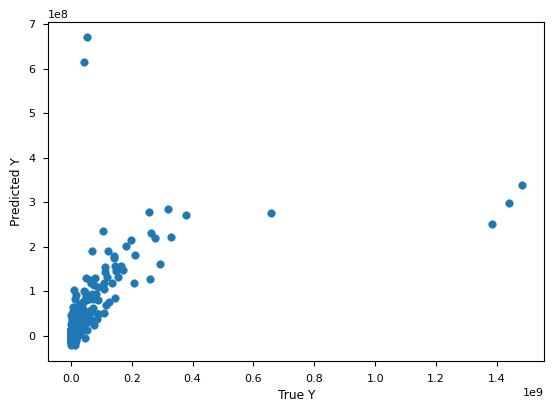

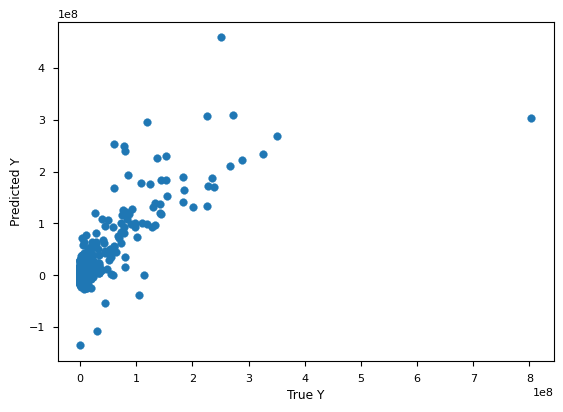

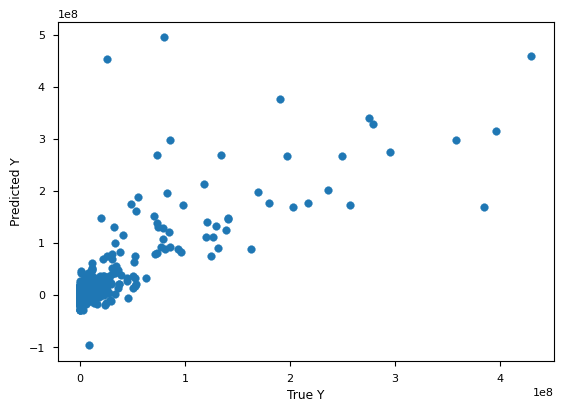

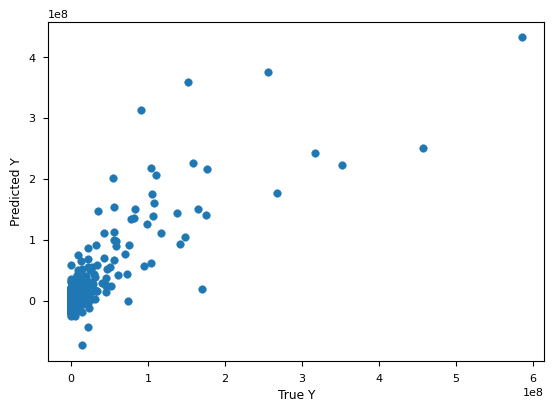

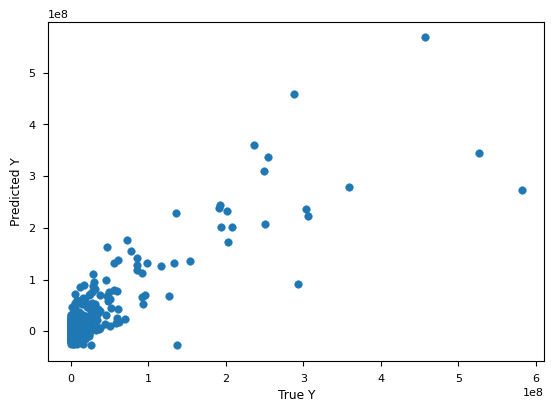

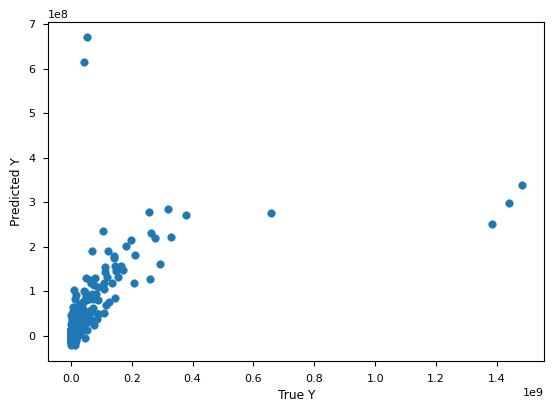

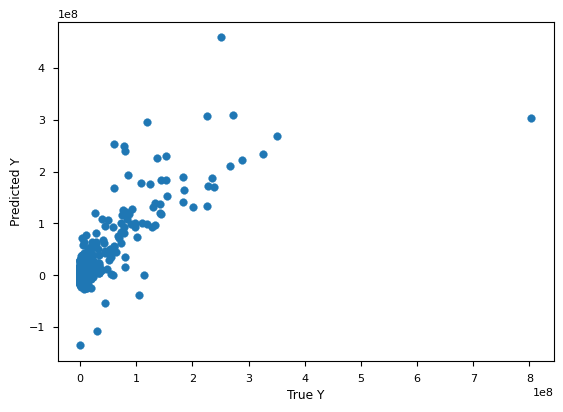

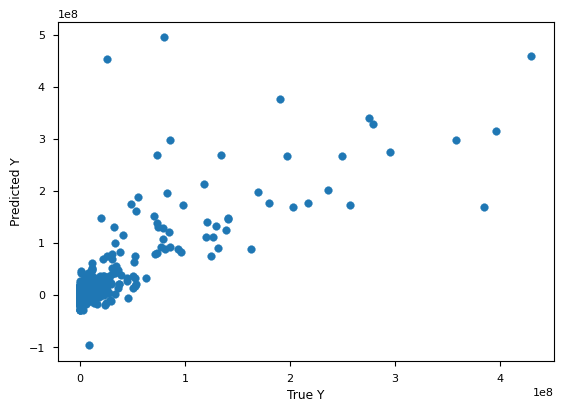

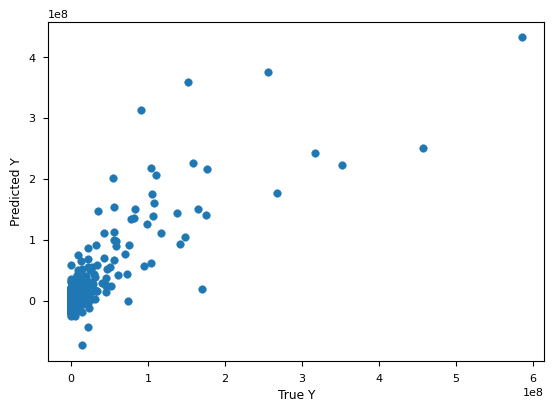

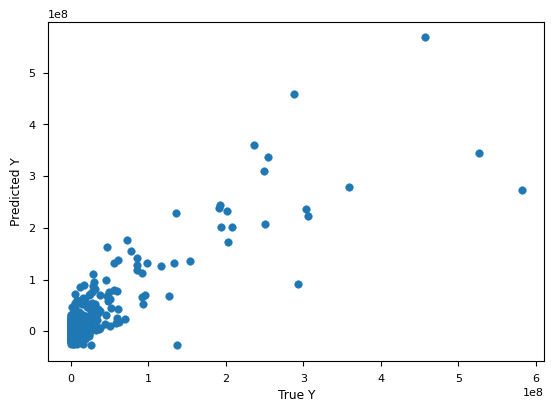

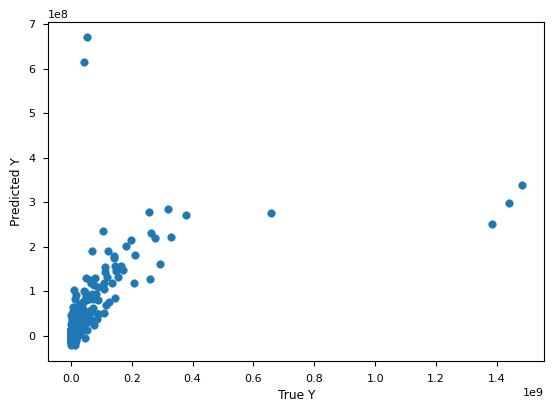

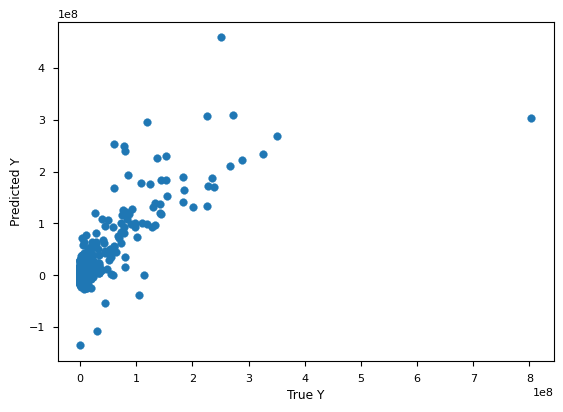

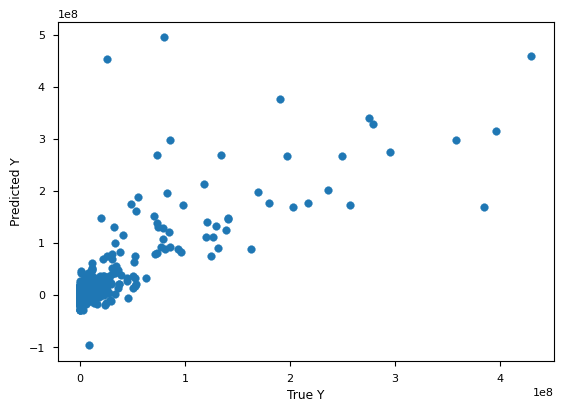

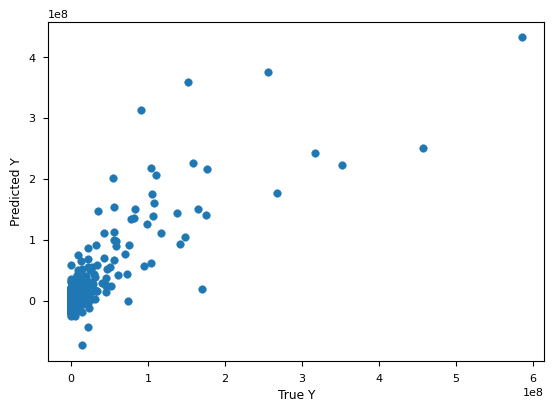

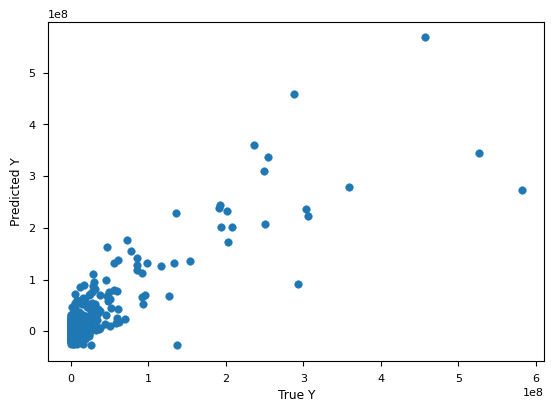

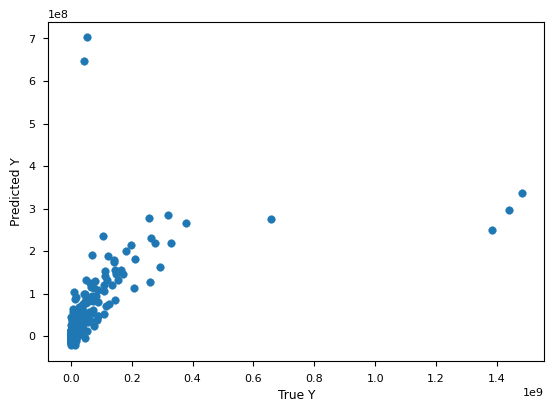

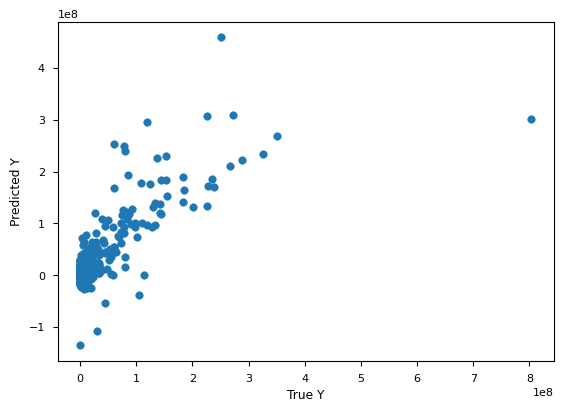

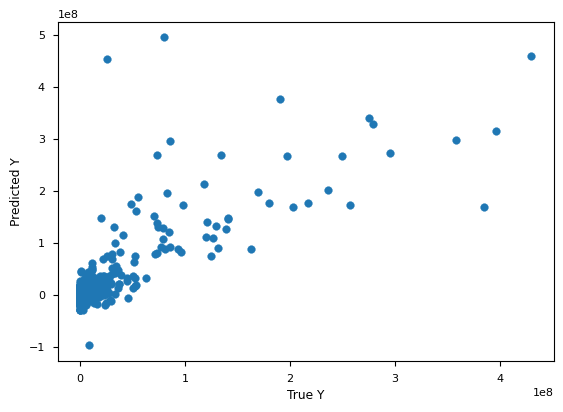

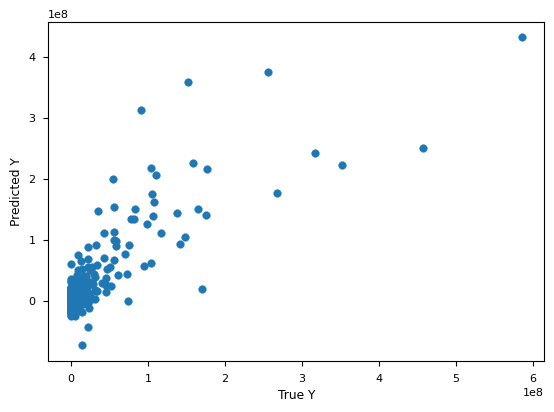

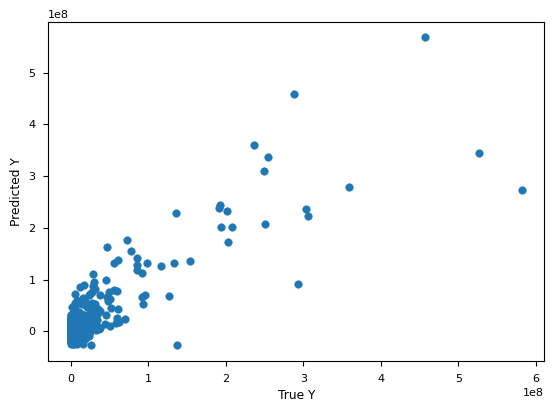

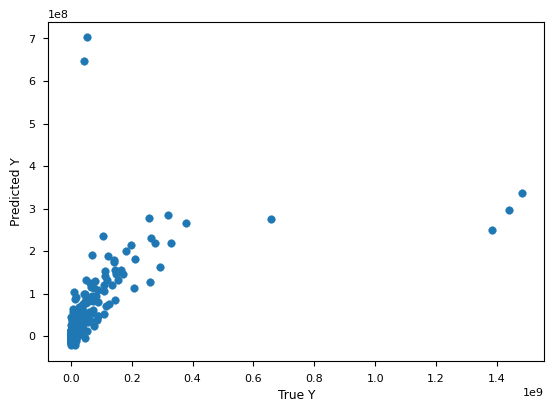

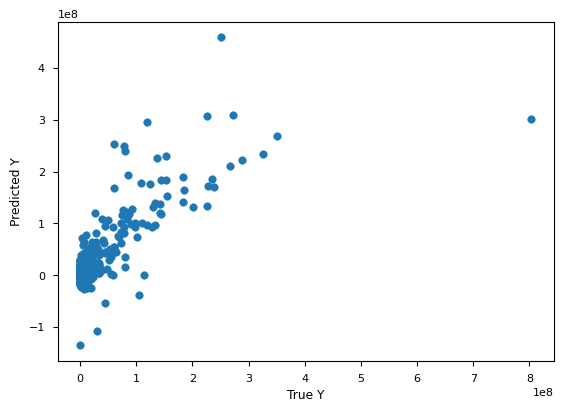

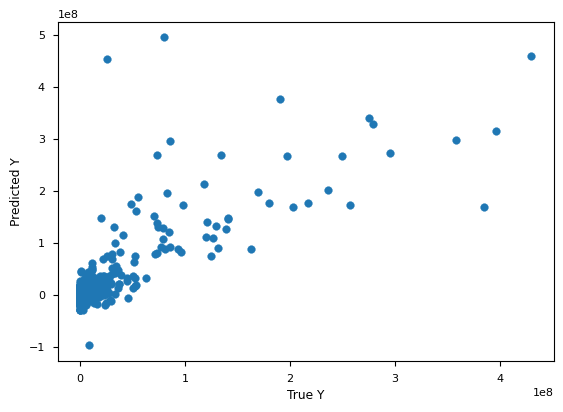

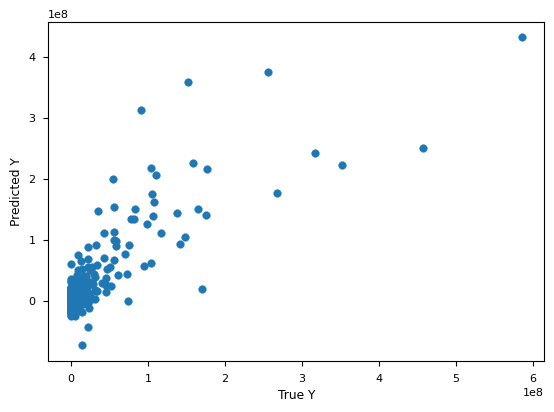

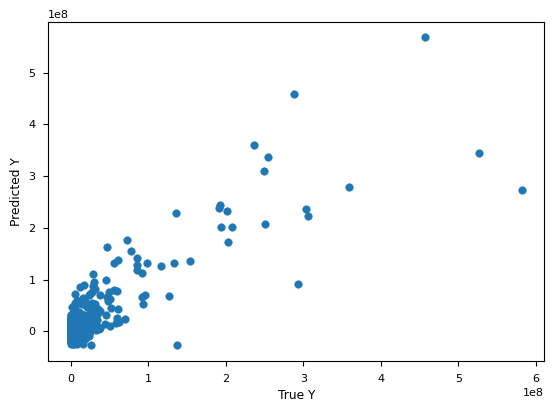

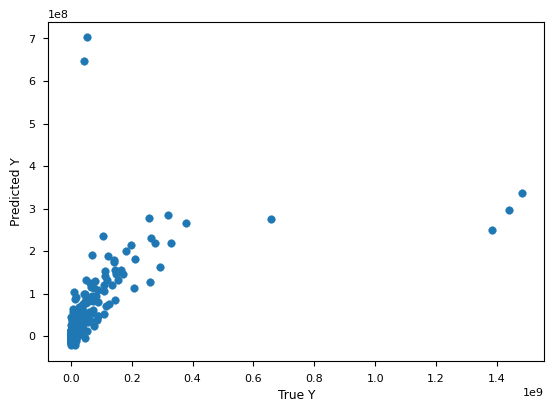

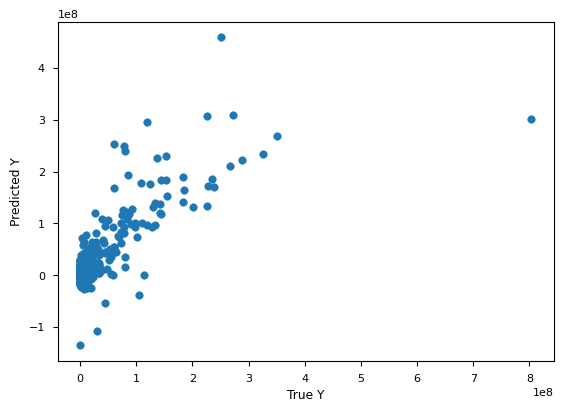

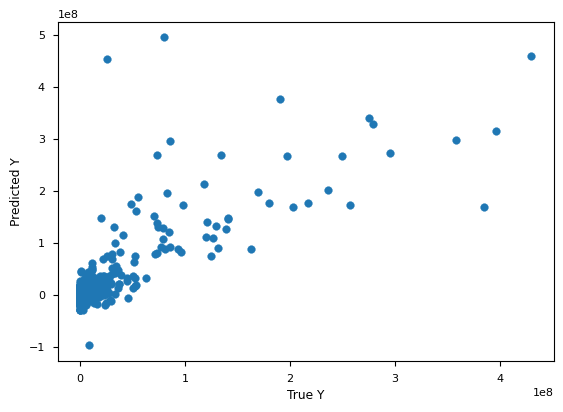

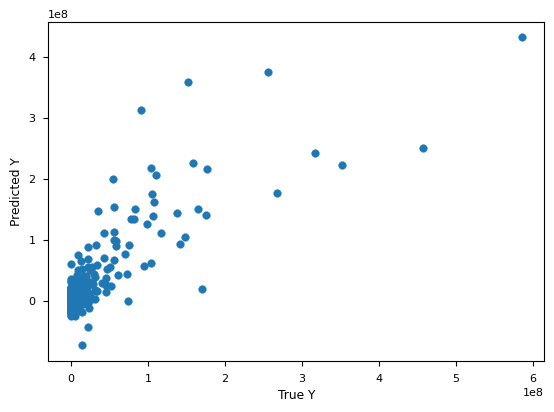

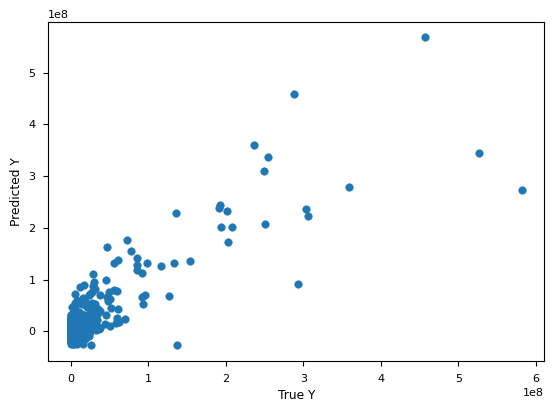

,Model,Error,Mean,Std
0,Ridge,MSE,1.500827e+15,1.709521e+15
1,Ridge,MAE,1.178226e+07,5.110209e+05
2,Ridge,R2,5.548658e-01,1.320481e-01
0,Lasso,MSE,1.519946e+15,1.745867e+15
1,Lasso,MAE,1.180767e+07,5.382622e+05
2,Lasso,R2,5.520748e-01,1.355878e-01


In [31]:

'''

Import Ridge regression and Lasso regression from sklearn
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Run 5-fold cross-validation, Ridge regression model on the data
  - Show average error for mean squared error, mean absolute error, r2 score ( a list of 3 values)
  - Show standard deviation over the K folds for the same 3 metrics (a list of 3 values)
  - Put these statistics in a pandas dataframe

Run 5-fold cross-validation, Lasso regression model on the data
  - Show average error for mean squared error, mean absolute error, r2 score ( a list of 3 values)
  - Show standard deviation over the K folds for the same 3 metrics (a list of 3 values)
  - Put these statistics in a pandas dataframe

Concatenate the two pandas dataframes
Print out the results

'''

# -------------------------------------------------------------------------
# IMPLEMENT - 1 Point
# -------------------------------------------------------------------------

# Initialize New Model
modelRidge = Ridge()

# Try K-fold Cross Validation with Three Different Error Metrics
k = 5
cross_val_metrics_ridge = cross_validate(modelRidge, X, Y, k, metrics=[mean_squared_error, metrics.mean_absolute_error, metrics.r2_score])

# Example Output
df_ridge = pd.DataFrame({"Model":["Ridge","Ridge","Ridge"],
                      "Error":["MSE", "MAE", "R2"],
                      "Mean":np.mean(cross_val_metrics_ridge, axis=1),
                      "Std":np.std(cross_val_metrics_ridge, axis=1)})



modelLasso = linear_model.Lasso()
cross_val_metrics_lasso = cross_validate(modelLasso, X, Y, k, metrics=[mean_squared_error, metrics.mean_absolute_error, metrics.r2_score])

# Example Output
df_lasso = pd.DataFrame({"Model":["Lasso","Lasso","Lasso"],
                      "Error":["MSE", "MAE", "R2"],
                      "Mean":np.mean(cross_val_metrics_lasso, axis=1),
                      "Std":np.std(cross_val_metrics_lasso, axis=1)})

result = pd.concat([df_ridge, df_lasso])
result

In [32]:
'''

Q: Which model is better?

'''

# -------------------------------------------------------------------------
# QUESTION - 1 Point
# -------------------------------------------------------------------------
# As we can see the ridge model has slightly lower MSE and MAE values as compared to Lasso and Ridge has a better R2 score as compared to the Lasso.
# We can say that Ridge has performed slightly better.
# Your answer.

'\n\nQ: Which model is better?\n\n'

##  [6] Real-World Application - Ocean (MS Student Only)

The CalCOFI dataset contains hydrographic data from 1949 to present. (https://www.kaggle.com/datasets/sohier/calcofi).

`ocean.csv` is generated by filtering the CalCOFI dataset, `bottle.csv`, from Kaggle describing a set of features/measurements at different ocean measurement stations (only one point in time). We filtered down to only (1) water temperature, (2) depth, (3) specific chemicals, and (4) removed data records/stations with missing data.

In [33]:

!wget -Nq https://raw.githubusercontent.com/csci461/dataset/main/ocean.csv

In [34]:
# Import Useful Libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Read Data Into Pandas Dataframe
df = pd.read_csv("ocean.csv")
df.head()

,Depthm,T_degC,Salnty,O2ml_L,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NO3uM,NH3uM
0,0,12.14,33.537,5.46,1.00,0.39,0.88,9.6,0.26,8.4,0.12
1,2,12.14,33.537,5.46,1.00,0.39,0.88,9.6,0.26,8.4,0.12
2,6,12.14,33.538,5.45,1.06,0.33,0.87,9.5,0.26,8.4,0.11
3,10,12.15,33.537,5.46,1.00,0.40,0.87,9.5,0.26,8.4,0.13
4,20,12.15,33.538,5.46,0.96,0.29,0.88,9.5,0.26,8.3,0.16


In [36]:
'''

Feature Description

"Depthm": Bottle depth in meters
"T_degC": Water temperature in degrees Celsius
"Salnty": Salinity (Practical Salinity Scale 1978)
"O2ml_L": Milliliters oxygen per liter of seawater
"ChlorA": Migrograms Chlorophyll-a per liter seawater, measured fluorometrically
"Phaeop": Micrograms Phaeopigment per liter seawater, measured fluormetrically
"PO4uM": Micromoles Phosphate per liter of seawater
"SiO3uM": Micromoles Silicate per liter of seawater
"NO2uM": Micromoles Nitrite per liter of seawater
"NO3uM": Micromoles Nitrate per liter of seawater
"NH3uM": Micromoles Ammonia per liter of seawater

'''

'\n\nFeature Description\n\n"Depthm": Bottle depth in meters\n"T_degC": Water temperature in degrees Celsius\n"Salnty": Salinity (Practical Salinity Scale 1978)\n"O2ml_L": Milliliters oxygen per liter of seawater\n"ChlorA": Migrograms Chlorophyll-a per liter seawater, measured fluorometrically\n"Phaeop": Micrograms Phaeopigment per liter seawater, measured fluormetrically\n"PO4uM": Micromoles Phosphate per liter of seawater\n"SiO3uM": Micromoles Silicate per liter of seawater\n"NO2uM": Micromoles Nitrite per liter of seawater\n"NO3uM": Micromoles Nitrate per liter of seawater\n"NH3uM": Micromoles Ammonia per liter of seawater\n\n'

In [37]:
# Define X (features) and Y (target/response) Variables
feature_list = ["Depthm","Salnty","O2ml_L","ChlorA","Phaeop","PO4uM","SiO3uM","NO2uM","NO3uM","NH3uM"]
target_variable = ["T_degC"]

X = df[feature_list].values
Y = df[target_variable].values

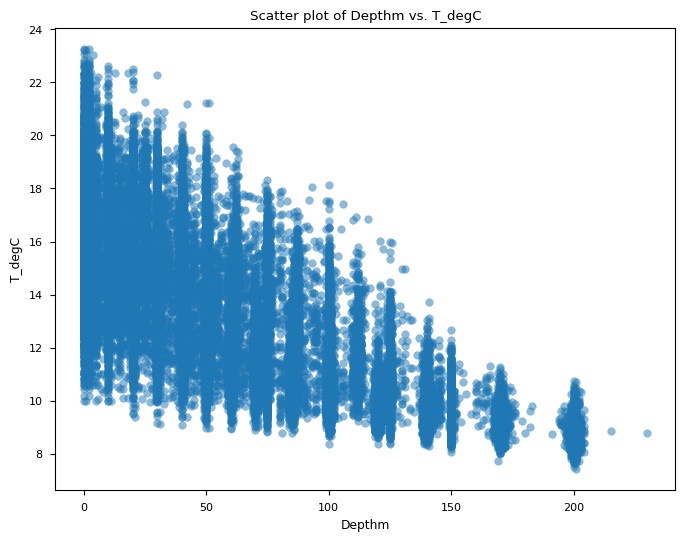

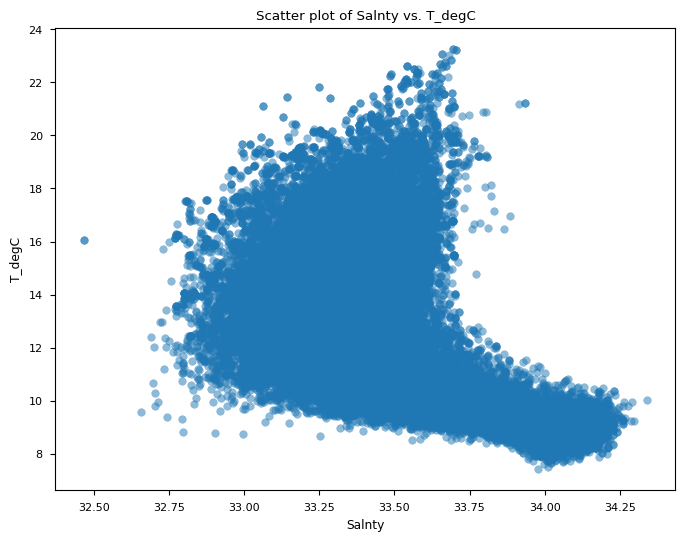

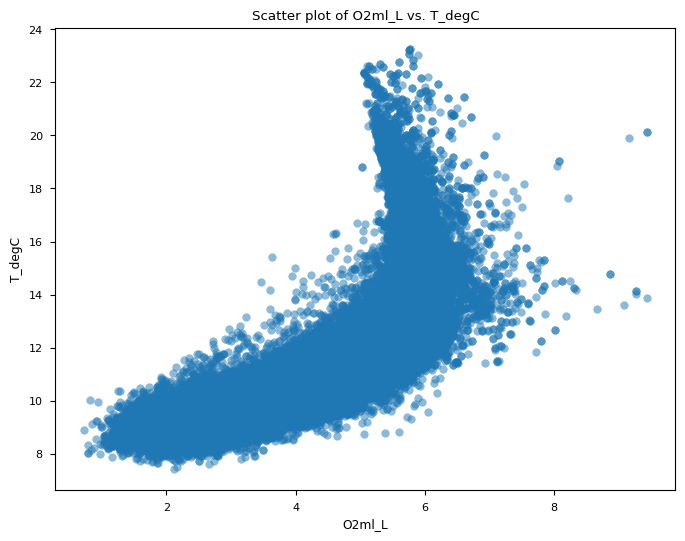

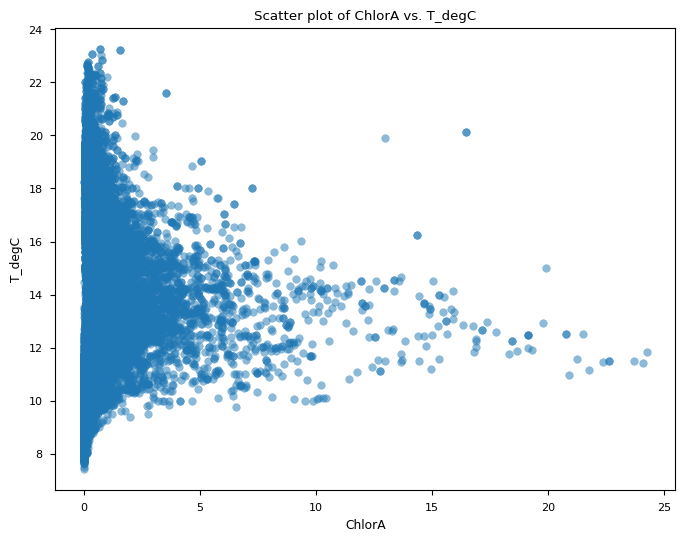

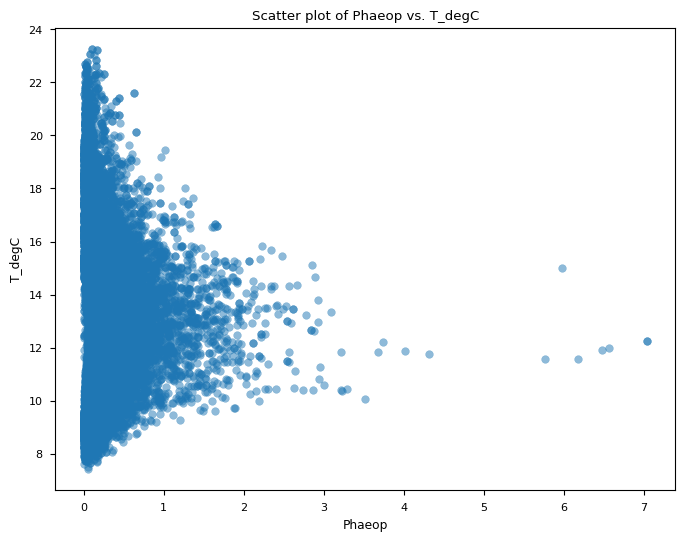

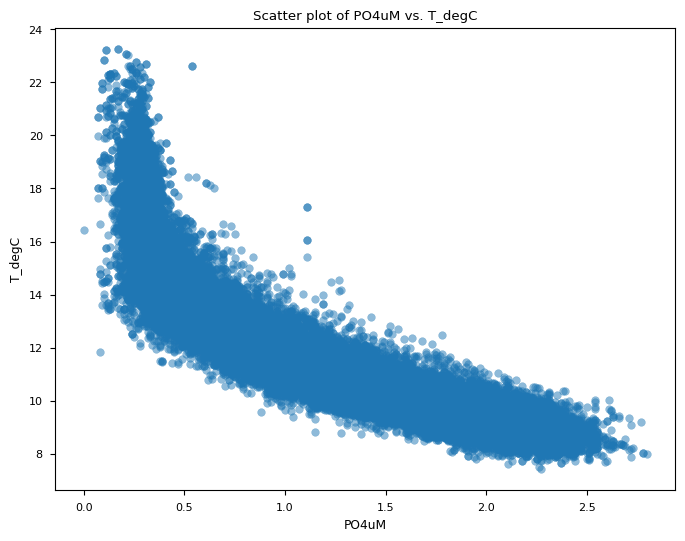

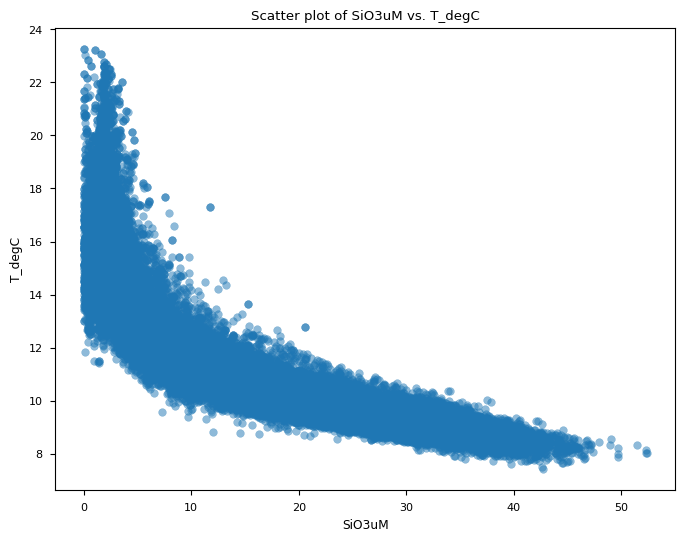

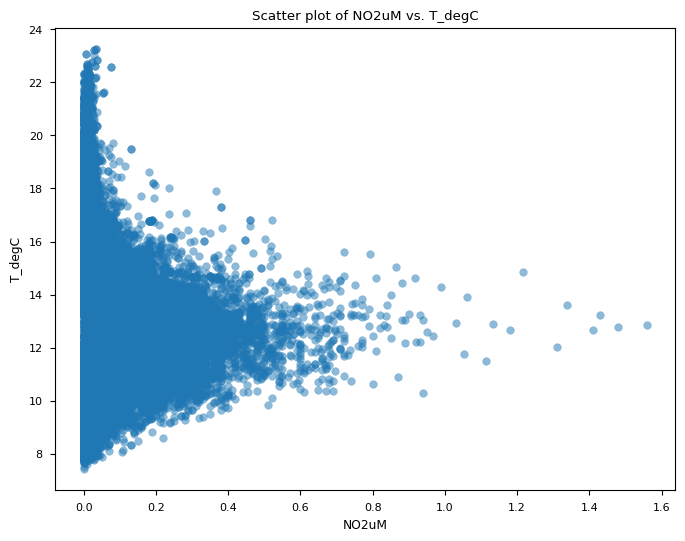

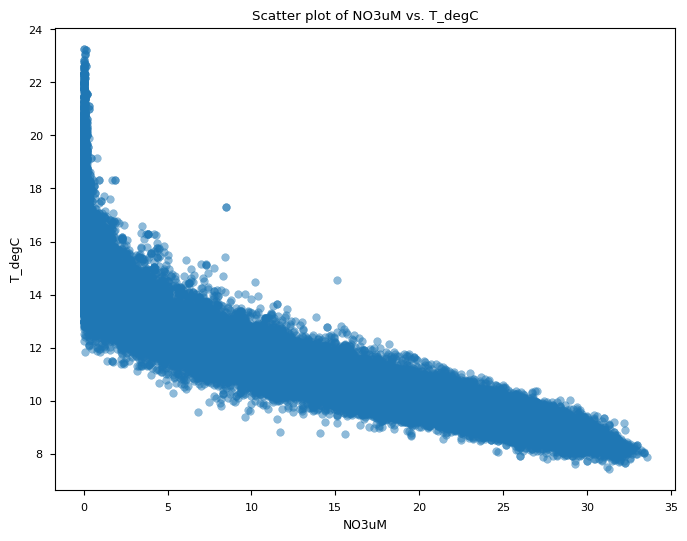

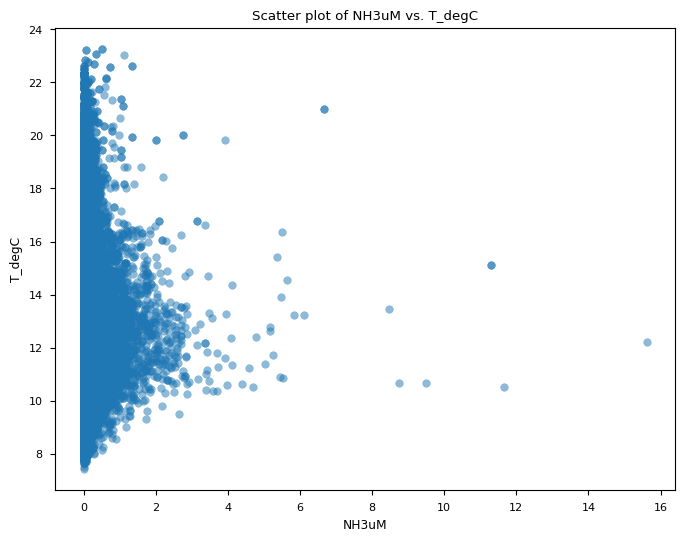

In [38]:
for feature in feature_list:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, feature_list.index(feature)], Y, alpha=0.5)
    plt.title(f"Scatter plot of {feature} vs. {target_variable[0]}")
    plt.xlabel(feature)
    plt.ylabel(target_variable[0])
    plt.show()

In the below cell, utilize the functions you created above to run 10-fold cross-validation and linear regression on the `ocean.csv` dataset.

  Error      Mean       Std
0   MSE  0.760811  0.024103
1   MAE  0.640435  0.007178
2    R2  0.920469  0.001812


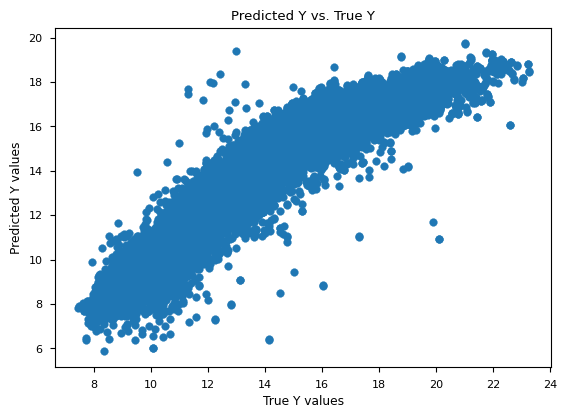

In [39]:
'''

Use sklearn KFold, LinearRegression

Run 10-fold cross-validation, linear regression model on the ocean data
  - Use sklearn r2_score, mean_squared_error, mean_absolute_error
  - Show average error over K folds for mean squared error, mean absolute error, r2 score ( a list of 3 values)
  - Show standard deviation over the K folds for the same 3 metrics (a list of 3 values)
  - Put these statistics in a pandas dataframe
  - Show a predicted Y vs true Y scatter plot

'''

# -------------------------------------------------------------------------
# IMPLEMENT - 1 Point
# -------------------------------------------------------------------------
# Initialize New Model
def cross_validate(model, X, y, k, metrics=[mean_squared_error]):
    num_metrics = len(metrics)
    cross_val_metrics = [[] for _ in range(num_metrics)]

    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Initialize KFold

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the model on the training set
        model.fit(X_train, y_train)

        # Evaluate the model using the specified metrics
        for j, metric in enumerate(metrics):
            y_pred = model.predict(X_test)
            metric_value = metric(y_test, y_pred)
            cross_val_metrics[j].append(metric_value)

    return cross_val_metrics

linear_model = LinearRegression()

# Specify the number of folds for cross-validation
k = 10
cross_val_metrics = cross_validate(linear_model, X, Y, k, metrics=[mean_squared_error, mean_absolute_error, r2_score])

# Create a dataframe to display the results
results_df = pd.DataFrame({
    "Error": ["MSE", "MAE", "R2"],
    "Mean": np.mean(cross_val_metrics, axis=1),
    "Std": np.std(cross_val_metrics, axis=1)
})

print(results_df)
# Create a scatter plot of predicted vs. true Y values
plt.scatter(Y, linear_model.predict(X))
plt.xlabel("True Y values")
plt.ylabel("Predicted Y values")
plt.title("Predicted Y vs. True Y")
plt.show()

In [40]:
'''

Q: Do linear regression model performs worse at predicting low or high water temperature
   (in degrees Celsius) based on the scatter plot?

'''

# -------------------------------------------------------------------------
# QUESTION - 1 Point
# -------------------------------------------------------------------------
# Your answer.
# Yes, linear regression model performs worse at predicting low or hight water temperature

'\n\nQ: Do linear regression model performs worse at predicting low or high water temperature\n   (in degrees Celsius) based on the scatter plot?\n\n'

Lastly, let's investigate **hyperparameter tuning**. Hyperparameter tuning is the process of choosing a set of optimal hyperparameters, which are model arguments whose value is set before the training process begins. In the cell below, conduct hyperparameter tuning on the alpha value used in Lasso regression.

In [41]:
'''

Split the ocean dataset into training, validation, and test set (60%-20%-20%) with random_state = 123

Hint: use sklearn train_test_split twice

Run Lasso regression model on the training and validation set for different alpha values
α = [0.1,0.5,1,5,10,20]

Print a pandas dataframe containing the validation mean squared error, mean absolute error, r2 score for each α

Determine the best α based on mean squared error, mean absolute error, r2 score

Run Lasso regression model on the training and test set with this α

Show test mean squared error, mean absolute error, r2 score

'''

# -------------------------------------------------------------------------
# IMPLEMENT - 1 Point
# -------------------------------------------------------------------------
from sklearn import linear_model

# Split the data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, Y, test_size=0.20, random_state=123)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=123)

# Define a list of alpha values to iterate through
alphas = [0.1, 0.5, 1, 5, 10, 20]

results = []

# Loop through alpha values
for alpha in alphas:
    # Create and fit the Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Predict on validation set
    y_pred = lasso.predict(X_valid)

    # Calculate metrics
    mse = mean_squared_error(y_valid, y_pred)
    mae = mean_absolute_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)

    # Append results to the list
    results.extend([
        ("Lasso", alpha, "MSE", mse),
        ("Lasso", alpha, "MAE", mae),
        ("Lasso", alpha, "R2", r2)
    ])

results_df = pd.DataFrame(results, columns=["Model", "Alpha", "Error", "Value"])

# Determine the best alpha based on MSE, MAE, and R2
best_alpha_mse = results_df[results_df['Error'] == 'MSE']['Value'].idxmin()
best_alpha_mae = results_df[results_df['Error'] == 'MAE']['Value'].idxmin()
best_alpha_r2 = results_df[results_df['Error'] == 'R2']['Value'].idxmax()

# Get the best alpha values
best_alpha_mse = results_df.loc[best_alpha_mse, 'Alpha']
best_alpha_mae = results_df.loc[best_alpha_mae, 'Alpha']
best_alpha_r2 = results_df.loc[best_alpha_r2, 'Alpha']

best_lasso_mse = Lasso(alpha=best_alpha_mse)
best_lasso_mse.fit(X_train, y_train)
y_test_pred_mse = best_lasso_mse.predict(X_test)

# Calculate test metrics for the best alpha (based on MSE)
test_mse = mean_squared_error(y_test, y_test_pred_mse)
test_mae = mean_absolute_error(y_test, y_test_pred_mse)
test_r2 = r2_score(y_test, y_test_pred_mse)

print("Results DataFrame:")
print(results_df)
print("\nBest Alpha (based on MSE):", best_alpha_mse)
print("Test MSE (best alpha based on MSE):", test_mse)
print("Test MAE (best alpha based on MSE):", test_mae)
print("Test R2 (best alpha based on MSE):", test_r2)

# # Example
# df = pd.DataFrame({"Model":["Lasso"]*18,"Alpha":[0.1,0.1,0.1,0.5,0.5,0.5,1,1,1,5,5,5,10,10,10,20,20,20],
#                    "Error":["MSE","MAE","R2"]*6,"Value":[0]*18})
# df = df.sort_values(["Error","Alpha"]).reset_index(drop=True)
# df

Results DataFrame:
    Model  Alpha Error     Value
0   Lasso    0.1   MSE  1.257703
1   Lasso    0.1   MAE  0.809340
2   Lasso    0.1    R2  0.867858
3   Lasso    0.5   MSE  1.904607
4   Lasso    0.5   MAE  1.036217
5   Lasso    0.5    R2  0.799891
6   Lasso    1.0   MSE  1.962065
7   Lasso    1.0   MAE  1.060090
8   Lasso    1.0    R2  0.793854
9   Lasso    5.0   MSE  2.424412
10  Lasso    5.0   MAE  1.204445
11  Lasso    5.0    R2  0.745277
12  Lasso   10.0   MSE  3.556076
13  Lasso   10.0   MAE  1.499833
14  Lasso   10.0    R2  0.626378
15  Lasso   20.0   MSE  3.645968
16  Lasso   20.0   MAE  1.513184
17  Lasso   20.0    R2  0.616933

Best Alpha (based on MSE): 0.1
Test MSE (best alpha based on MSE): 1.2396841688522202
Test MAE (best alpha based on MSE): 0.8074095374950285
Test R2 (best alpha based on MSE): 0.8686294224260073
